# Pantograph model

Lecture 115 - March 12, 2019.

Math 502 - Winter 2018

Recall we are studying this example:

An electric train, with overhead wires to supply power, has a **pantograph** on top, which is a spring-loaded lever that reaches up to touch the wire.

<img src="images/Pantograph.png" width=300 />

We want to describe the mathematics of such a setup, which is important for high speed trains. For instance,  we need to know the wires don't start oscillating madly and fall off their supports, or disconnect from the train, or maybe make waves that reflect off the supports and do strange things. 

You should read about this model in Howison, Chapter 11. ("Practical Applied Mathematics.")

You can read his Howison's text online here : [people.maths.ox.ac.uk/fowler/courses/tech/sdh.pdf](https://people.maths.ox.ac.uk/fowler/courses/tech/sdh.pdf)

You may also read Chapeter 9 and 10, about **distributions** such as the Dirac delta function. 


### Plotting some solutions

We've done some work solving this, let's take the opportunity to plot soem of the results so we can really "see" what is going on. 

First case we had was when the pantograph (or pole/lever) first touches the overhead wire. With no gravity, the solution is some kind of decaying exponential. The interesting features, though, is that there is kink in the wire where the pole touches the wire. And the contact point is moving. 

Let's see if we can capture all this in a plot.



In [3]:
from numpy import *
from matplotlib.pyplot import *
from ipywidgets import interact


In [48]:
## Let's plot a wave solution, in case you haven't seen that before

def g(x):
    return sin(3*x)*exp(-x**2)

def h(x):
    return cos(5*x)*exp(-(x**2))

x = linspace(-10,10,500)
                        
def display(t):
    plot(x,g(x-t)+h(x+t))
    ylim([-1,1])

interact(display,t=(-5.,5.,.1));                        

interactive(children=(FloatSlider(value=0.0, description='t', max=5.0, min=-5.0), Output()), _dom_classes=('wi…

## Solution  1

Remember we had something like
$$ y(x,t) = g(t-x) \mbox{ in region 1}$$
and $$ y(x,t) = h(t+x) \mbox{ in region 2} $$
and zero outside these regions (when $x>t$ or $x<-t$). 

The form for $g(t)$ was a constant plus expontial, $g(=A(1-\exp(t-x))$ while $h$ was given by a continuity condition at the contact point $x = ut$, so
$$ g(t-ut) =  h(t + ut).$$ 
From thus, we see we have
$$h(t) = g(\frac{1-u}{1+u}t).$$

In [36]:
A = -1  # some scaling constant that comes from the reduced DE

def y1(x,t,u):
    if x > t:
        return 0
    if x < -t:
        return 0
    if x > u*t:
        return A*(1-exp(x-t))
    if x < u*t:
        return A*(1-exp((1-u)*(x+t)/(1+u)))
    
def y1a(x,t,u):
    left = A*(1-exp((1-u)*(x+t)/(1+u)))
    right = A*(1-exp(t-x))
    return maximum(0,minimum(left,right))

x = linspace(-2,2,500)

def display1(t,u):
    plot(x,y1a(x,t,u))
    ylim([-.1,1.5])

interact(display1,t=(0.,2.,.1),u=(.1,.95,.05));

interactive(children=(FloatSlider(value=1.0, description='t', max=2.0), FloatSlider(value=0.5, description='u'…

### Warning:

We set A= -1, but really it might depend on u (and the spring constants). So this picture is a bit misleading. Maybe you would like to try to fix this...

Here is my rough work as I tried to get the code to run properly. Python is fussy about vectors and tests like x > t, when x is a vector and t is a scalar. 

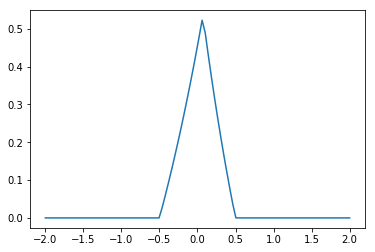

In [23]:
A = -1
u = .5
t = .5
x = linspace(-2,2,100)
left = A*(1-exp((1-u)*(x+t)*(1+u)))
right = A*(1-exp(t-x))
plot(x,maximum(0,minimum(left,right)));

## Solution  2

This is the case where the train has just passed a support at x=0, so we can have a reflection of the wave off the back support. 

Remember we had something like
$$ y(x,t) = g_1(t-x) \mbox{ in region 1}$$
and $$ y(x,t) = g_2(t-x) + h_2(t+x) \mbox{ in region 2} $$
and zero outside these regions (when $x>t$ or $x<-t$). 

After a lot of work, and some simplifying assumptions (e.g. $f_1 = 0$) we found that function $g_2$ is linear:
$$g_2(t) = at.$$

From the rigid support condition $g_2(t) + h_2(t) = 0$ we find that
$$h_2(t) = -at.$$
Thus we find in region 2 that
$$y(x,t) = g_2(t-x) + h_2(t+x) = a(t-x) - a(t+x) = -2ax.$$

Continuity at the contact point gives us
$$g_1(t-ut) = g_2(t-ut) + h_2(t+ux) =  = -2aut,$$
so we can write
$$g_1(t) = \frac{-2ut}{1-u}.$$

So the answer is piecewise linear, and continuous.

To be honest, this seems really boring!  On the plus side, we can graph piecewise linear functions really easily.

The three important points, where we get a "bend" in the wire are
$$ x = 0. x = ut, x=t.$$
The value of $y(x,t)$ at these points are just
$$y = 0, y= -2aut, y = 0.$$
 
We display this in the next cell.

In [38]:
a = -1  # some scaling constant that comes from the reduced DE

def display2(t,u):
    plot([0,u*t,t,3],[0,-2*a*u*t,0,0])
    ylim([-.1,2.5])

interact(display2,t=(0.,2.,.1),u=(.1,.95,.05));

interactive(children=(FloatSlider(value=1.0, description='t', max=2.0), FloatSlider(value=0.5, description='u'…

### Note:
The triangular bump is symmetric when u=1/2. That's interesting. 

## Solution  3

This is the case where we consider the whole span between two supports. Notice Howison only solved for the force function $f(t)$ of the pantograph. We want to know that this is well behaved. 

After a lot of work, he concludes $f(t)$ is piecewise continuous, and piecewise linear. The jumps occur at these times
$$t_n = \frac{1}{u}(1- \mu^n),$$
where the constant $\mu = (1-u)/(1+u)$ is related to the train speed, and sits between 0 and 1. 

Notice this means the $t_n$ form a sequence that increases to 1, and gets dense there. So, you are hitting lots of reflections.

The jump in f at $t_n$ is given by a recursion
$$jump(f)_{t_n} = \frac{f_2}{\mu(2 + f_2)}jump(f)_{t_{n-1}}.$$
We solve this easily, with
$$jump(f)_{t_n} = \left(\frac{f_2}{\mu(2 + f_2)} \right)^n jump(f)_{t_0}.$$

The jump in f' at $t_n$ is given by a recursion
$$jump(f')_{t_n} = \frac{f_2}{\mu^2(2 + f_2)}jump(f)_{t_{n-1}}.$$
We solve this easily, with
$$jump(f')_{t_n} = \left(\frac{f_2}{\mu^2(2 + f_2)} \right)^n jump(f')_{t_0}.$$

This is enough information to determine the piecewise continuous, piecewise linear function $f(t)$. 

Here's an exercise for the class. How do we plot this? Seems like it should be easy. 